In [1]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
 
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

In [2]:
X, y = make_blobs(n_samples=120, centers=4, n_features=2,cluster_std=0.40, random_state=0)
print(type(X))

<class 'numpy.ndarray'>


(120, 2)
(120,)


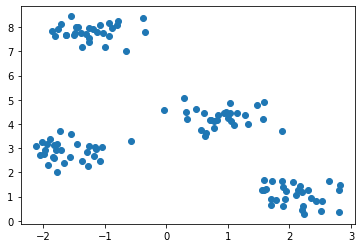

In [3]:
print(X.shape)
print(y.shape)

plt.scatter(X[:,0],X[:,1])

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


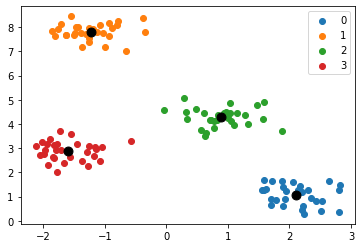

Inertia: 35.470591636759174


In [4]:
def KMeansFun(data, num_clust):
    kmeans = KMeans(n_clusters=num_clust)
    label = kmeans.fit_predict(X)

    centroids = kmeans.cluster_centers_
    u_labels = np.unique(label)


    for i in u_labels:
        plt.scatter(data[label == i , 0] ,data[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    plt.show()

    print("Inertia:", kmeans.inertia_)


KMeansFun(X,4)

EXAMPLE II


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


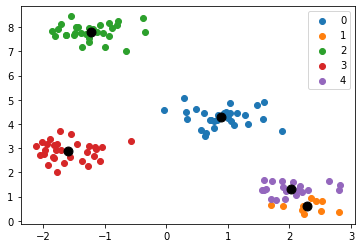

Inertia: 31.562140564695213


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


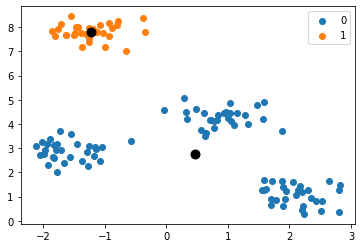

Inertia: 404.7604033850421


In [5]:

KMeansFun(X,5)
KMeansFun(X,2)

K-means++

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


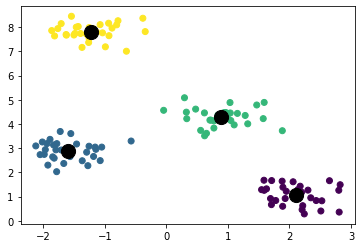

Inertia: 35.470591636759174


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


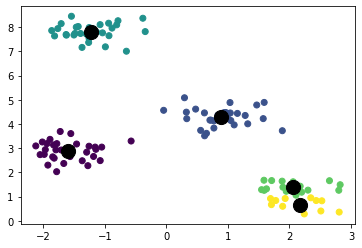

Inertia: 31.496228410965145


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


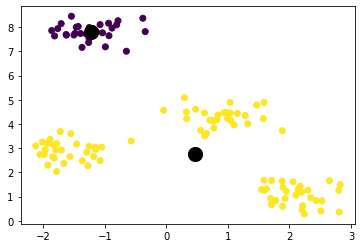

Inertia: 404.7604033850421


In [6]:
def KMeansFun_plus_plus(dataX, dataY, num_clust):
    kmeans = KMeans(init='random', n_clusters=num_clust)
    kmeans.fit(dataX, dataY)
    pred = kmeans.predict(dataX)

    plt.scatter(dataX[:, 0], dataX[:, 1], c=pred)

    cluster_centers = kmeans.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200)
    plt.show()
    print("Inertia:", kmeans.inertia_)


KMeansFun_plus_plus(X,y,4)
KMeansFun_plus_plus(X,y,5)
KMeansFun_plus_plus(X,y,2)


Elbow Method

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

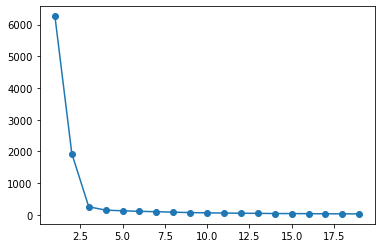

In [7]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

cluster_cnt = range(1, 20)
inertia_values = [KMeans(init='k-means++', n_clusters=clusters).fit(X, y).inertia_ for clusters in cluster_cnt]
plt.plot(cluster_cnt, inertia_values, marker='o')

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


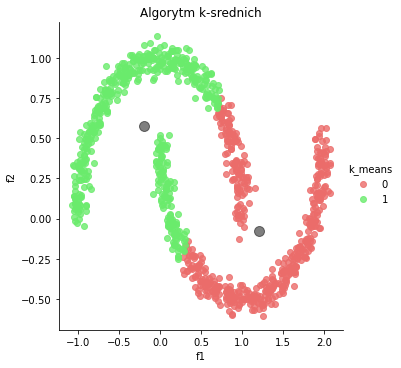

In [8]:
from sklearn.datasets import make_moons
import seaborn as sns
import pandas as pd
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

model = KMeans(init='k-means++', n_clusters=2)
model.fit(x, y)
y_km = model.predict(x)
centers = model.cluster_centers_
 
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

Clustering II - hierarchical methods

In [9]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

(300, 2)
(1000,)


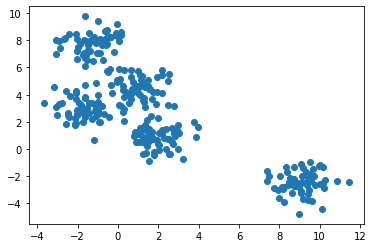

In [10]:
print(X.shape)
print(y.shape)

plt.scatter(X[:,0],X[:,1])

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


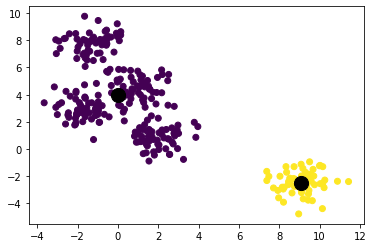

Inertia: 2457.7778032489864


In [11]:
kmeans = KMeans(init='random', n_clusters=2)
kmeans.fit(X, y)
pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200)
plt.show()
print("Inertia:", kmeans.inertia_)


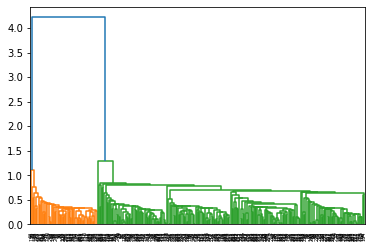

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(X)
dendrogram1 = dendrogram(link)

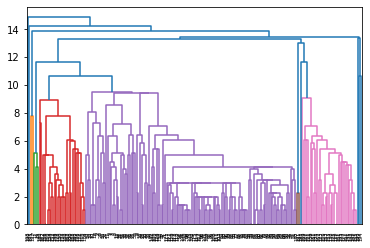

In [13]:
import pandas as pd

df = pd.read_csv('shopping_data.csv')
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X = X.to_numpy()

link = linkage(X,method='single')
dendrogram2 = dendrogram(link)

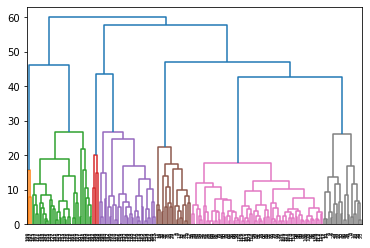

In [14]:
df = pd.read_csv('shopping_data.csv')
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X = X.to_numpy()
link = linkage(X,method='average')
dendrogram3 = dendrogram(link)

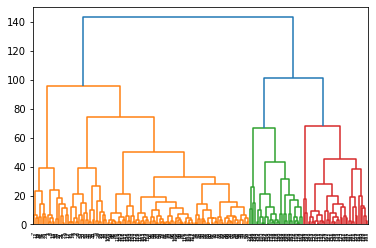

In [15]:
df = pd.read_csv('shopping_data.csv')
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X = X.to_numpy()
link = linkage(X,method='complete')
dendrogram3 = dendrogram(link)

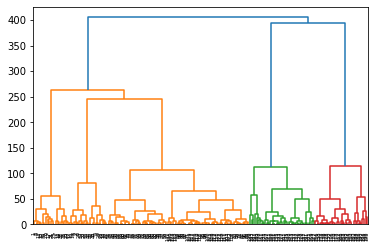

In [16]:
df = pd.read_csv('shopping_data.csv')
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X = X.to_numpy()
link = linkage(X,method='ward')
dendrogram3 = dendrogram(link)

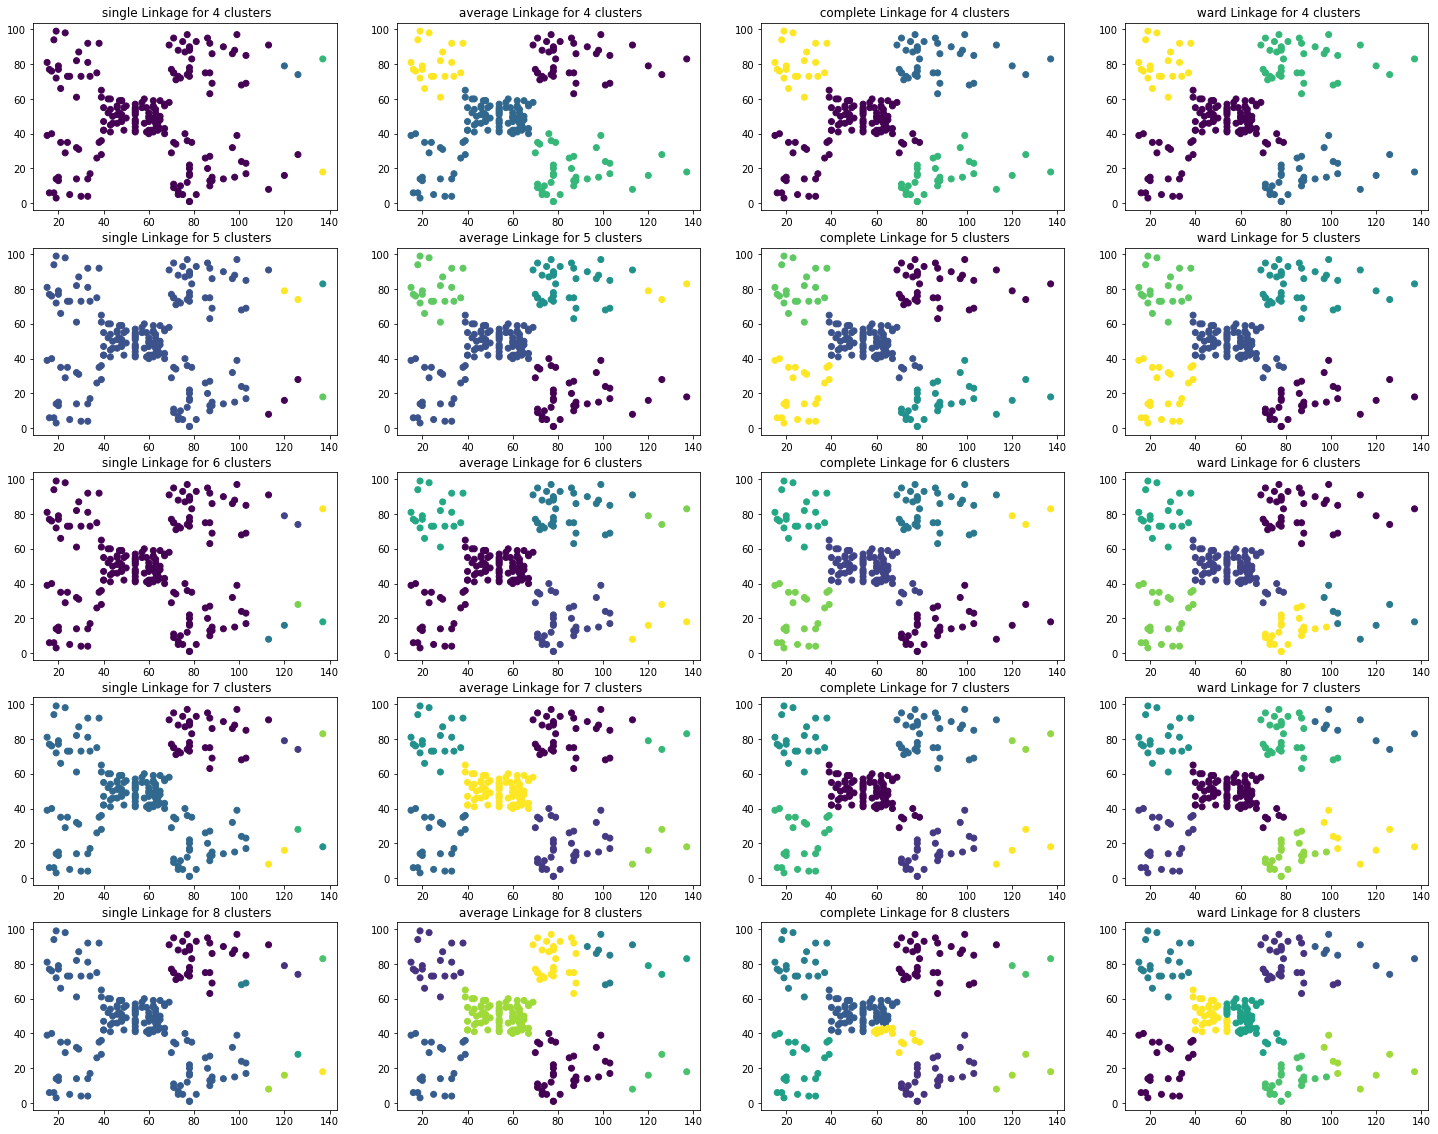

In [17]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

plot_title = ["Single Linkage", "Average Linkage", "Complete Linkage", "Ward Linkage"]
link_method =["single", "average", "complete", "ward"]
n_clusters =  [4,5,6,7,8]
plot_num = 1
plt.figure(figsize=(25, 20))

for k in n_clusters:
    for method in link_method:
        algorithm = AgglomerativeClustering(n_clusters=k, linkage=method)
        algorithm.fit(X)
        plt.subplot(5, 4, plot_num)
        plt.scatter(X[:, 0], X[:, 1], c=algorithm.labels_)
        plt.title(f' {method} Linkage for {k} clusters')
        plot_num +=1


Selecting the number of clusters with silhouette analysis on KMeans clustering

In [18]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 
 

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.7049787496083262


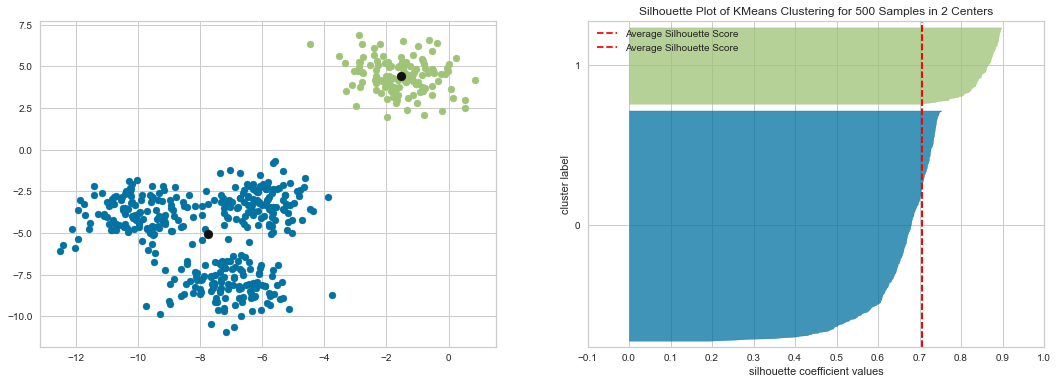

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.5882004012129721


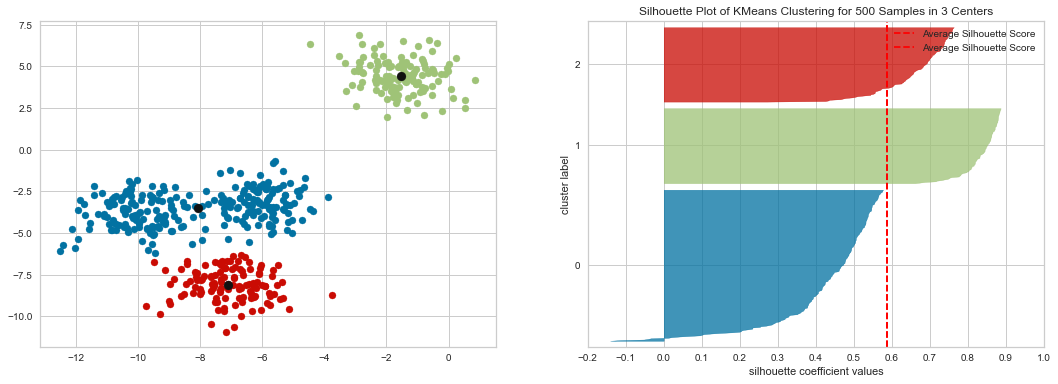

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.6505186632729437


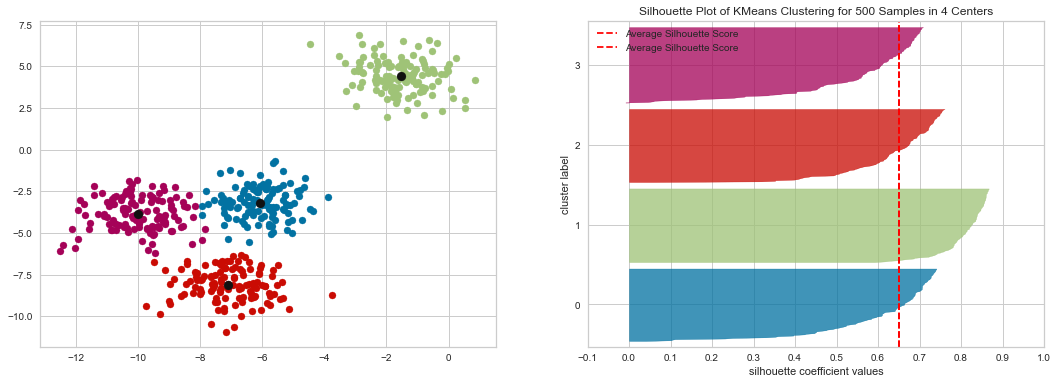

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.5746932321727457


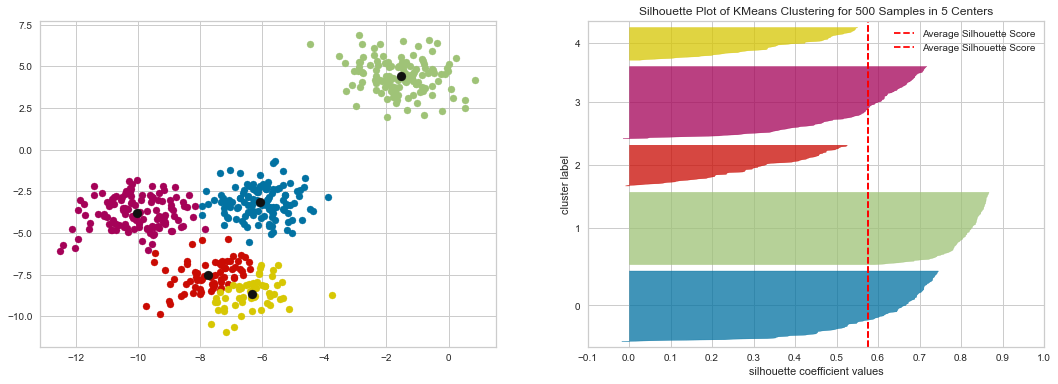

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.5150064498560357


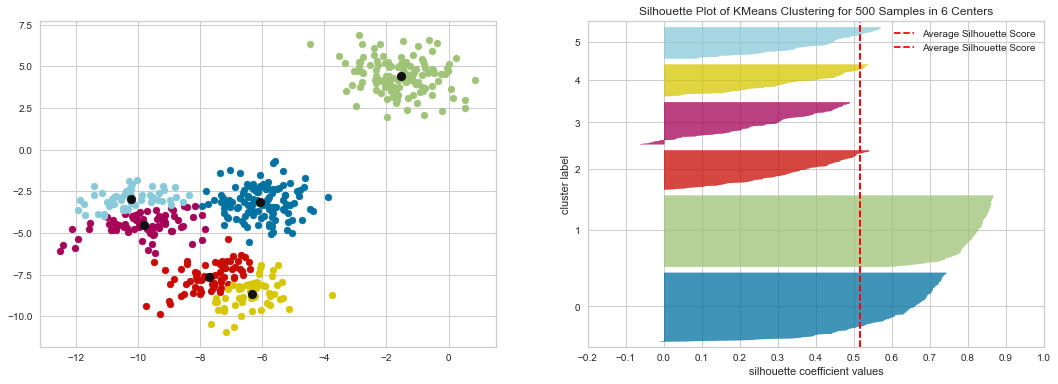

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import silhouette_visualizer


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
cluster_range = [2,3,4,5,6]

for k in cluster_range:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    print(silhouette_score(X,labels))
    centroids = kmeans.cluster_centers_
    u_labels = np.unique(labels)
    for i in u_labels:
        ax1.scatter(X[labels == i , 0] ,X[labels == i , 1] , label = i)
    ax1.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.legend()
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    silhouette_visualizer(kmeans, X, colors='yellowbrick', ax=ax2)
    visualizer.poof()


DBSCAN - density based clusterring

c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

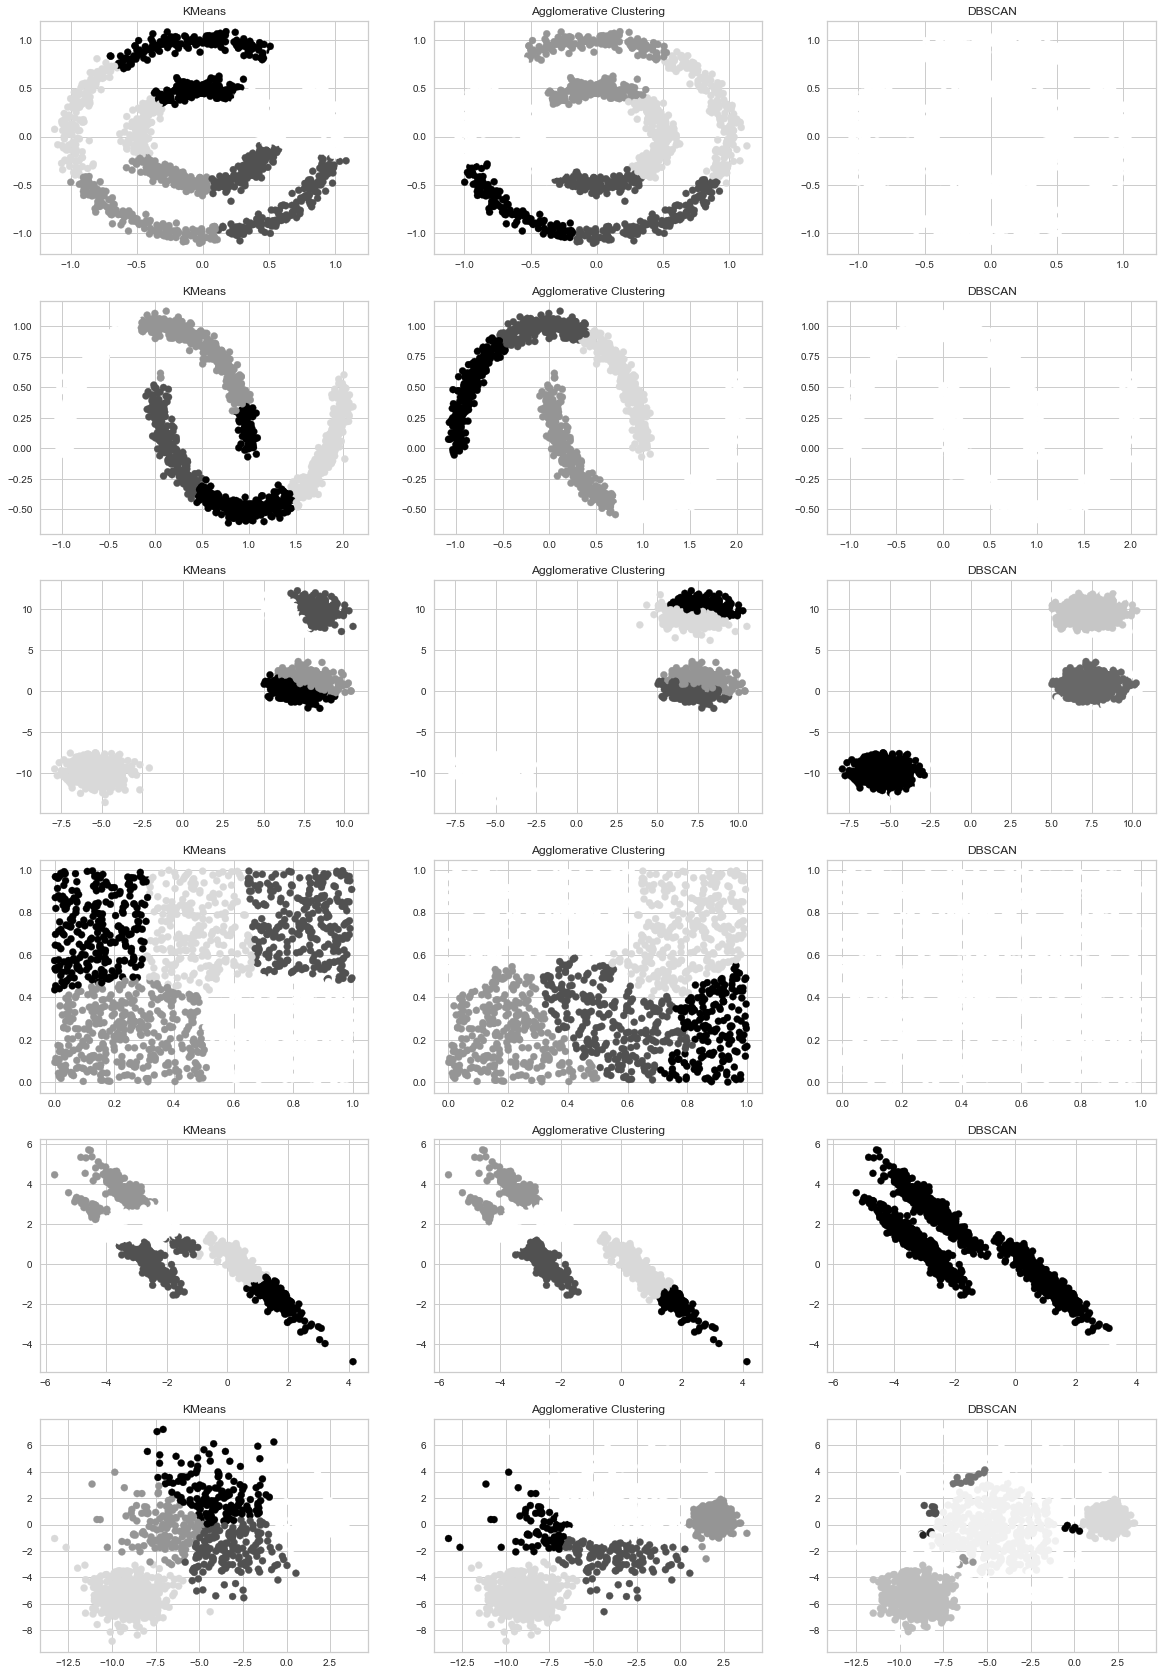

In [20]:
from sklearn import  datasets
 
 
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)


from sklearn.cluster import KMeans, DBSCAN

datasets = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
plot_num = 1
plt.figure(figsize=(20, 30))
for dataset in datasets:
    y_pred_km = KMeans(n_clusters=5).fit_predict(dataset[0], dataset[1])
    y_pred_ag = AgglomerativeClustering(n_clusters=5).fit_predict(dataset[0] ,dataset[1])
    y_pred_db = DBSCAN().fit_predict(dataset[0], dataset[1])
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_km)
    plt.title("KMeans")
    plot_num += 1
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_ag)
    plt.title("Agglomerative Clustering")
    plot_num += 1
    
    plt.subplot(6, 3, plot_num)
    plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred_db)
    plt.title("DBSCAN")
    plot_num += 1